# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること.

In [1]:
%matplotlib inline
from sympy import *
from IPython.display import display
init_printing(use_unicode=True)

a, b, x, y, z, t = symbols('a b x y z t')
x0 = symbols('x_0')
M, N = symbols('M N')
f, g, h = symbols('f g h', cls=Function)

# Plotting モジュール
`Pyglet` は古いモジュールなので使う（勉強する）必要なし.

## はじめに
`plotting` モジュールは 2-3 次元のプロットをするためのモジュール.
バックエンドの `matplotlib` を使っている.
2 次元のプロットに `TextBackend` を使うこともできる.

次のような機能がある.

- plot: 2 次元の線をプロット.
- plot_parametric: 2 次元のパラメータつきプロット.
- plot_implicit: 2 次元の陰的で領域を描くプロット.
- plot3d: 2 変数関数の 3 次元プロット.
- plot3d_parametric_line: パラメータ表示の 3 次元の線のプロット.
- plot3d_parametric_surface: 3 次元内の曲面のプロット.

上の関数は便利なので定義されているだけで,
対応する `Series` クラスを `Plot` に引数として渡せば何でもプロットできる.

## まずはサンプルをいくつか

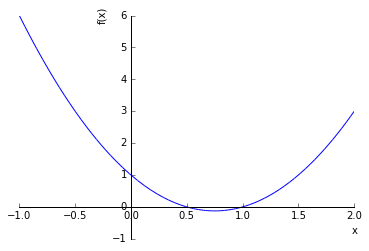

In [4]:
%matplotlib inline
from sympy import init_printing
from sympy.plotting import plot
from sympy.core import Function
from sympy import symbols

f = symbols('f', cls=Function)
f = 2 * x ** 2 - 3 * x + 1

# 関数の定義
# xが[-1, 2]の範囲を図示する
plot(f, (x, -1, 2))

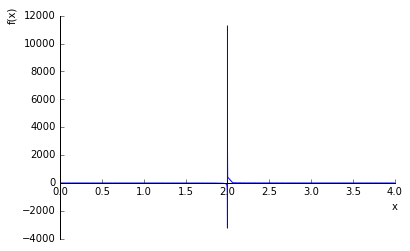

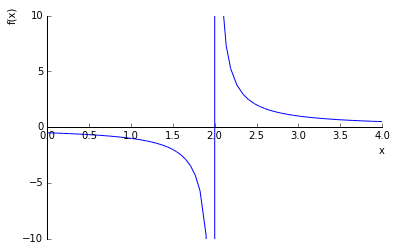

In [5]:
%matplotlib inline
from sympy import init_printing
init_printing() 

from sympy import symbols
from sympy.plotting import plot
x = symbols('x')

# y のデフォルト値を設定しないとまともに見られない
plot(1/(x - 2), (x, 0, 4))

# y 軸の値を制限して表示
plot(1/(x - 2), (x, 0, 4), ylim=(-10, 10))

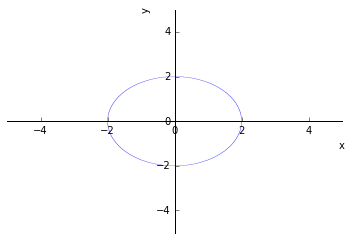

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sy

x, y = sy.symbols('x y')
p1 = sy.plot_implicit(sy.Eq(x**2 +y**2, 4))
fg, ax = p1._backend.fig, p1._backend.ax  # get matplotib's figure and ax

# Use matplotlib to change appearance: 
ax.axis('tight')  # list of float or {‘on’, ‘off’, ‘equal’, ‘tight’, ‘scaled’, ‘normal’, ‘auto’, ‘image’, ‘square’}
ax.set_aspect("equal") # 'auto', 'equal' or a positive integer is allowed
ax.grid(True)
fg.canvas.draw()

plt.show()  # enter matplotlib's event loop (not needed in Jupyter)

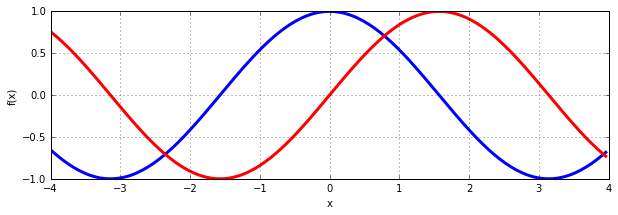

In [8]:
%matplotlib inline
from sympy import mpmath
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 3
mpmath.plot([cos, sin], [-4, 4])

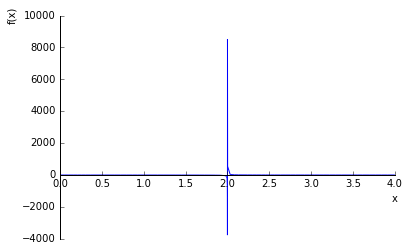

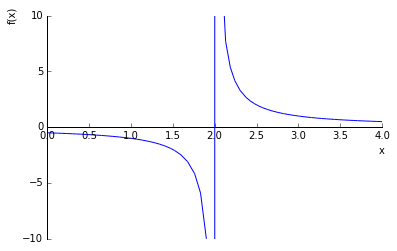

In [6]:
from sympy import init_printing
init_printing() 

from sympy import symbols
from sympy.plotting import plot
x = symbols('x')

# y のデフォルト値を設定しないとまともに見られない
plot(1/(x - 2), (x, 0, 4))

# y 軸の値を制限して表示
plot(1/(x - 2), (x, 0, 4), ylim=(-10, 10))

## Plot Class
`class sympy.plotting.plot.Plot(*args, **kwargs)`

### `plot`
基本的なメソッド.
基本的な引数や指定の仕方は次の例を参考にすること.
線の色づけなどもう少し詳しい話がある：[公式](http://docs.sympy.org/latest/modules/plotting.html)を見ること.

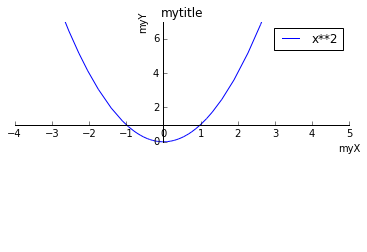

In [1]:
%matplotlib inline
from sympy import init_printing
init_printing()

from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(x*x,
          title='mytitle', xlabel='myX', ylabel='myY',
          legend=True, xscale='linear', yscale='linear', # linear は log にも変えられる
          axis=True, axis_center=[0.0, 1.0],
          xlim=[-4.0, 5.0],
          ylim=[-6.0, 7.0],
          aspect_ratio=[1.0, 1.0], autoscale=True,
          margin=0.5
    )

### `append`
グラフを追加して出力できる.
同じ図中に 2 つのグラフを突っ込んでくれるわけではないらしい.
`matplotlib` にはもちろんそうしたメソッドがあるし, 探せばあるはず: 調査中.

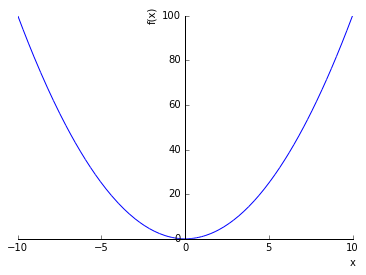

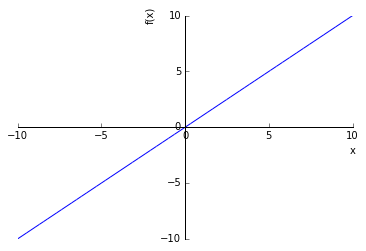

In [5]:
%matplotlib inline
from sympy import init_printing
init_printing()

from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(x*x)
p2 = plot(x)
p1.append(p2[0])
p1

### `extend()`
`append()` と `extend()` の違いがあまりよくわかっていない: 継続調査.

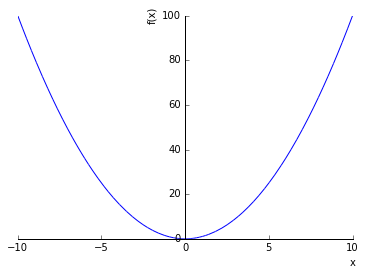

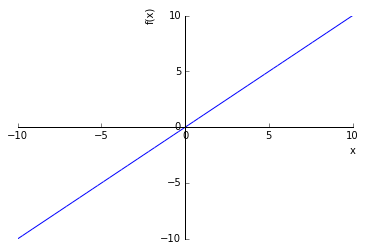

In [3]:
%matplotlib inline
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(x*x)
p2 = plot(x)
p1.extend(p2)
p1

## Plotting 関数群のリファレンス
### `sympy.plotting.plot.plot(*args, **kwargs)`

**使い方**

デフォルトの定義域は $(-10, 10)$ だが,
これは将来変更される可能性がある.

**単一プロット `plot(expr, range, **kwargs)`**:
定義域が指定されていない場合のデフォルトは $(-10, 10)$.

**同じ定義域で複数プロット `plot(expr1, expr2, ..., range, **kwargs)`**:
定義域が指定されていない場合のデフォルトは $(-10, 10)$.

**違う定義域で複数プロット: `plot((expr1, range), (expr2, range), ..., **kwargs)`**:
定義域は個々の式で指定する.

**引数**

- expr: 1 変数関数を表す式.
- range: 自由変数の変域を表す 3 タプル, (x, 0, 5) のように指定する.

**キーワード引数**

プロット関数に対する引数:

- show: boolean.
  デフォルト値は `True`.
  `False` を指定すると関数はプロットされない.
  帰ってきた `Plot` クラスのインスタンスは `save()` や `show()` でそれぞれ指定の動きをするために使える.

LineOver1DRangeSeries クラスに対する引数:

- adaptive: boolean.
  デフォルト値は `True`.
  一様なサンプリングがほしいとき, `False` にして `nb_of_points` を指定すること.

- depth: int.
  adaptive algorithm の再帰の深さを指定する整数 (?).
  値 $n$ の深さを指定すると最大で $2^n$ 個の点をサンプルとして試す (?).

- nb_of_points: int.
  `adaptive` が `False` のときに使う.
  `nb_of_points` で指定した点の分だけ関数は点をサンプルする.

Aesthetics オプション:

- line_color: float. 
  プロットの色を指定する.
  どう指定するかは `Plot` を見ること (あとできちんと書く).
  複数のプロットがあるとき同じ series が全てのプロットに対して適用される.
  個別に設定したいなら 返ってきた `Plot` オブジェクトをインデックスして指定する.

`Plot` クラスに対する引数:

- title: str. 
  プロットのタイトル.
  プロットが 1 つの式しかないなら  式の LaTeX 表現に設定される.
- xlabel: str. x 軸のラベル.
- ylabel: str. y 軸のラベル.
- xscale: str, 'linear' か 'log'. x 軸のスケールを設定.
- yscale: str, 'linear' か 'log'. y 軸のスケールを設定.
- axis_center: 'center' か 'auto' か 中心の座標を示す float の 2-タプル.
- xlim: x 軸の限界を示す float の 2-タプル.
- ylim: y 軸の限界を示す float の 2-タプル.

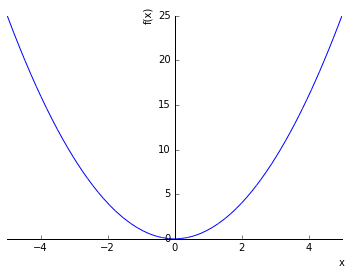

In [6]:
%matplotlib inline
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
plot(x**2, (x, -5, 5))

関数を並べると複数の関数をプロットできる.

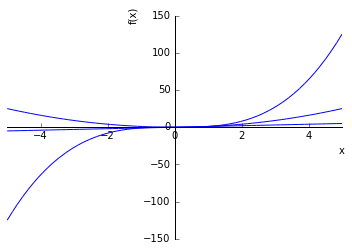

In [7]:
%matplotlib inline
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
plot(x, x**2, x**3, (x, -5, 5))

定義域を変えて関数をプロットする.

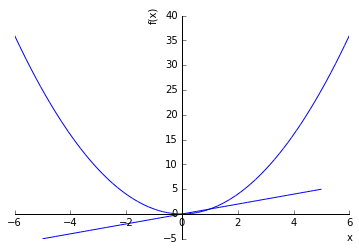

In [9]:
%matplotlib inline
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
plot((x**2, (x, -6, 6)), (x, (x, -5, 5)))

`adaptive` とか `nb_of_points` は後で調べる.

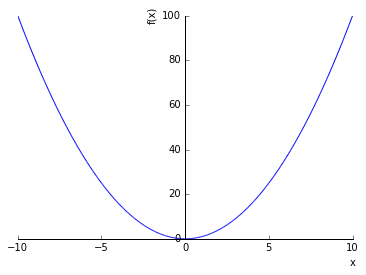

In [12]:
%matplotlib inline
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
plot(x**2, adaptive=False, nb_of_points=400)

### `sympy.plotting.plot.plot_parametric(*args, **kwargs)`

2 次元のパラメータプロット.

正確にプロットするために適応性のあるアルゴリズムを使っている.
適切にランダムに点を取っているため同じプロットでもやるたびごとに少し違う結果になることがある.

Plot, Parametric2DLineSeries も参考にすること.

**使い方**

単一のプロット.

`plot_parametric(expr_x, expr_y, range, **kwargs)`

range が指定されていないときはデフォルトとして $(-10, 10)$ を使う.
将来デフォルトの range 見地アルゴリズムが実装されたとき,
デフォルトの定義域は変わる可能性がある.
以下同様.

同じ定義域の複数のプロット

`plot_parametric((expr1_x, expr1_y), (expr2_x, expr2_y), range, **kwargs)`

range が指定されていないときはデフォルトとして $(-10, 10)$ を使う.

定義域が違う複数のプロット.

`plot_parametric((expr_x, expr_y, range), ..., **kwargs)`

定義域は式ごとに指定しなければならない.

**引数**

- expr_x: $x$ に対する関数を表す式.
- expr_y: $x$ に対する関数を表す式.
- range: 自由変数の変域を表す 3 タプル, (u, 0, 5) のように指定する.

**キーワード引数**

`Parametric2DLineSeries` クラスに対する引数:

- adaptive: Boolean.
  デフォルト値は `True`.
  一様なサンプリングがほしいときは `False` にして `nb_of_points` を指定すること.
- depth: int.
  adaptive algorithm の再帰の深さを指定する整数 (?).
  値 $n$ の深さを指定すると最大で $2^n$ 個の点をサンプルとして試す (?).
- nb_of_points: int.
  `adaptive` が `False` のときに使う.
  `nb_of_points` で指定した点の分だけ関数は点をサンプルする.

**Aesthetics**

- line_color: プロットの色を指定する関数. 
  詳しくは `sympy.plotting.Plot` を見ること.
  複数のプロットがある場合, 同じ `Series` 引数が適用される.
  個別に指定したいなら返ってきたオブジェクトにインデックスをつけそれを設定できる.

`Plot` クラスに対する引数:

- xlabel: str. $x$ 軸に対するラベル.
- ylabel: str. $y$ 軸に対するラベル.
- xscale: str, 'linear' か 'log'. x 軸のスケールを設定.
- yscale: str, 'linear' か 'log'. y 軸のスケールを設定.
- axis_center: 'center' か 'auto' か 中心の座標を示す float の 2-タプル.
- xlim: x 軸の限界を示す float の 2-タプル.
- ylim: y 軸の限界を示す float の 2-タプル.

### 例
単一パラメータのプロット.

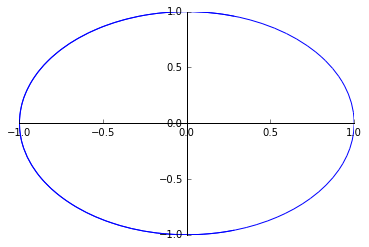

In [6]:
%matplotlib inline
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
u = symbols('u')
plot_parametric(cos(u), sin(u), (u, -5, 5))

単一の定義域に対する複数のパラメータプロット.

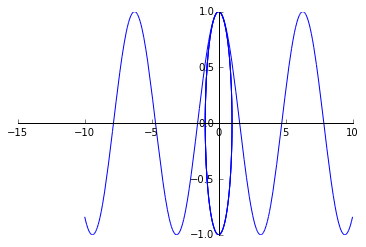

In [3]:
%matplotlib inline
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
u = symbols('u')
plot_parametric((cos(u), sin(u)), (u, cos(u)))

複数のパラメータプロット.

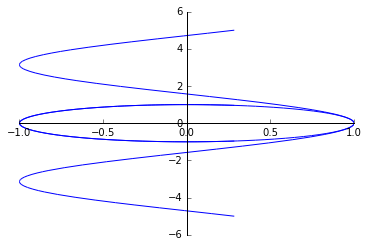

In [4]:
%matplotlib inline
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
u = symbols('u')
plot_parametric((cos(u), sin(u), (u, -5, 5)), (cos(u), u, (u, -5, 5)))